# UBC Scientific Software Seminar 

## 28 October 2016 

Today's agenda: 
* PCA revisited
    * Visualizing principal components
* Unsupervised learning
    * Clustering with k-means
    * Digits dataset: how manyd ifferent kinds of 1s are there? 
    * implementing k-means

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=2)

In [5]:
digits_2D = pca.fit_transform(digits.data)

In [6]:
pc1 = pca.components_[0,:]
pc2 = pca.components_[1,:]

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

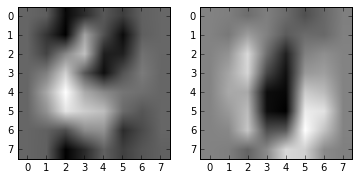

In [10]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(pc1.reshape(8,8), cmap='binary')
ax[1].imshow(pc2.reshape(8,8), cmap='binary')

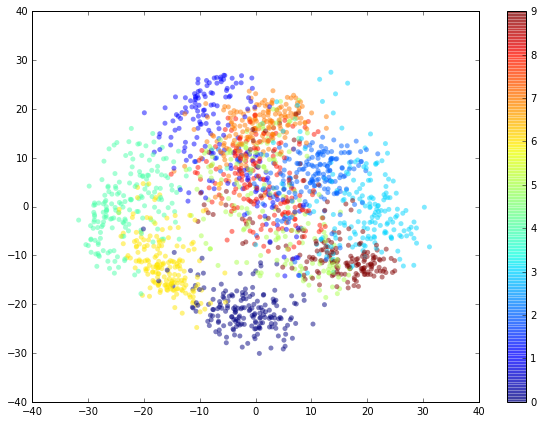

In [18]:
plt.figure(figsize=(10,7));
plt.scatter(digits_2D[:,0], digits_2D[:,1], c=digits.target, s=25, alpha=.5, lw=0);
plt.colorbar();

In [19]:
pca5 = PCA(n_components=5)
digits_5D = pca5.fit_transform(digits.data)

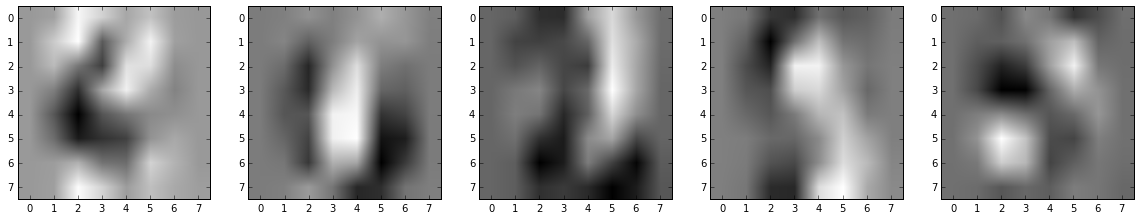

In [22]:
fig5, ax5 = plt.subplots(1,5,figsize=(20,8))

for j in range(5):
    ax5[j].imshow(pca5.components_[j, :].reshape(8,8), cmap='gray')

Now let's do some clustering using the PCs

Question: How many kinds of 1's are there? 

In [23]:
ones = digits.data[digits.target == 1]

In [24]:
ones_2D = pca.fit_transform(ones)

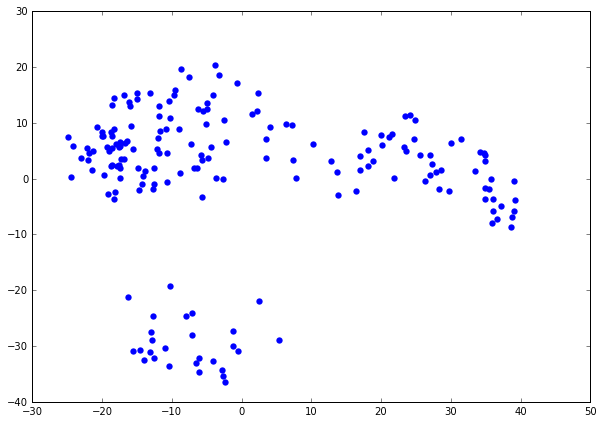

In [26]:
plt.figure(figsize=(10,7));
plt.scatter(ones_2D[:,0], ones_2D[:,1], s=40, lw=0);

Kind of looks like there could be three different clusters of 1's. *i.e.*, there are three different ways that people tend to write the number 1. Let's use $k$-means to try to cluster the ones and see how to represent these different ways of writing 1

In [28]:
from sklearn.cluster import KMeans

In [46]:
N_clus = 3
ones_km = KMeans(n_clusters=N_clus)

In [47]:
ones_km.fit(ones)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [48]:
ones_cc64 = ones_km.cluster_centers_

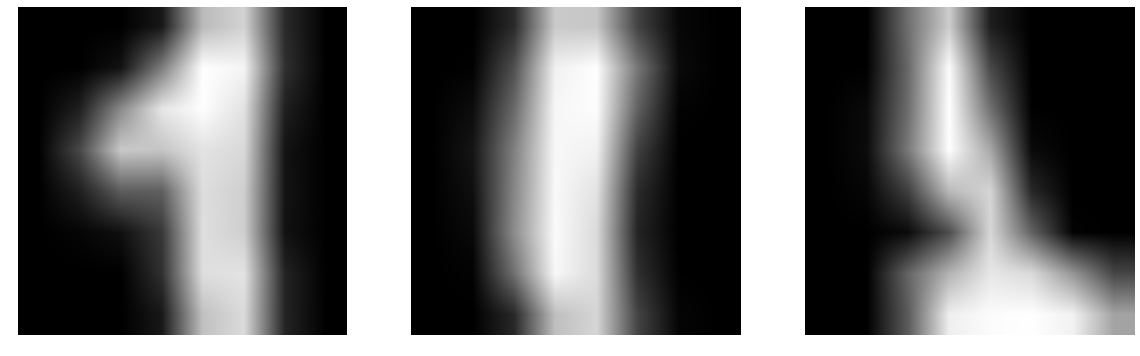

In [49]:
fig, ax = plt.subplots(1,N_clus, figsize=(20,8))
for j in range(N_clus):
    ax[j].imshow(ones_cc64[j,:].reshape(8,8), cmap='gray')
    ax[j].axis('off')

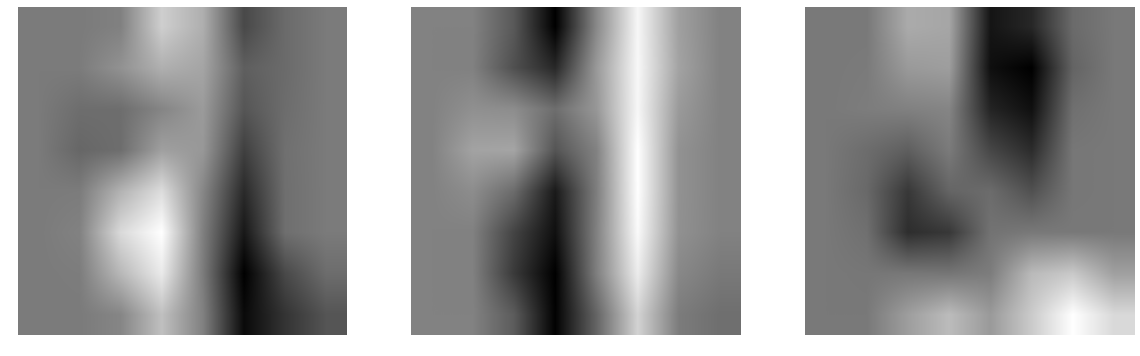

In [53]:
ones_km.fit(ones_2D)
ones_cc2 = ones_km.cluster_centers_
fig, ax = plt.subplots(1, N_clus, figsize=(20,8))
for j in range(N_clus):
    onesImage = ones_cc2[j,0]*pca.components_[0,:] + ones_cc2[j,1]*pca.components_[1,:];
    ax[j].imshow(onesImage.reshape(8,8), cmap='gray')
    ax[j].axis('off')

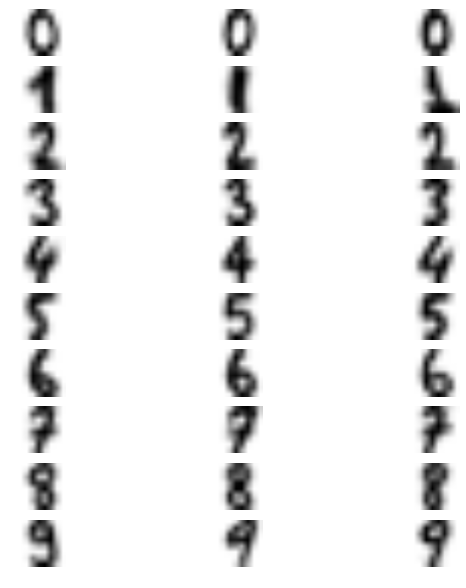

In [52]:
N = 3
plt.figure(figsize=(10,10))
plt.subplot(10,N,1)
for n in range(0,10):
    this_digit = digits.data[digits.target == n]
    km = KMeans(n_clusters=N)
    km.fit(this_digit)
    kinds_of_this_digit = km.cluster_centers_
    for m in range(0,N):
        plt.subplot(10, N, n*N + m + 1)
        plt.imshow(kinds_of_this_digit[m,:].reshape(8,8),cmap='binary')
        plt.axis('off')
plt.show()

1. Collect all the 4s
2. Use Kmeans to find 3 clusters
3. classify all the 4s by these 3 clusters
4. use pca to plot the 4s in 2d with colors according to the labels from #3

In [56]:
fours = digits.data[digits.target == 4]
km4 = KMeans(n_clusters=3)
km4.fit(fours)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [57]:
pca4 = PCA(n_components=2)
fours_2D = pca4.fit_transform(fours)

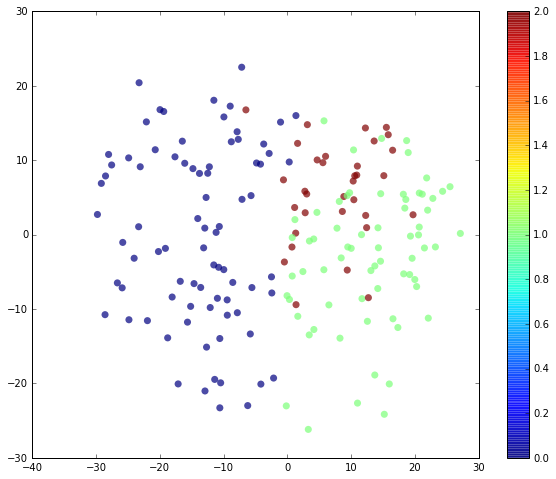

In [67]:
plt.figure(figsize=(10,8));
plt.scatter(fours_2D[:,0], fours_2D[:,1], c=km4.labels_, lw=0, s=50, alpha=.7);
plt.colorbar()

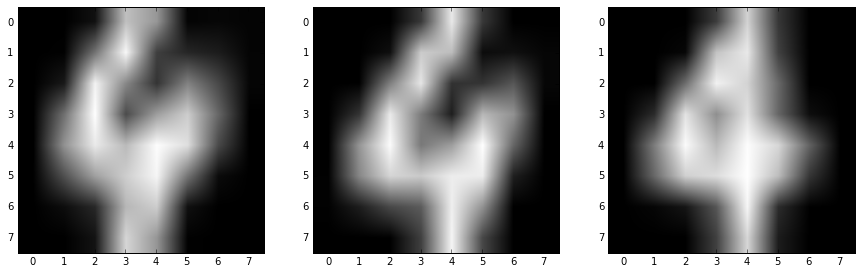

In [66]:
fig,ax = plt.subplots(1,3,figsize=(15,8))
for j in range(3):
    this_four = fours[km4.labels_ == j]
    archetype = np.mean(this_four, axis=0)
    ax[j].imshow(archetype.reshape(8,8),cmap='gray')